<a href="https://colab.research.google.com/github/vijayabalan07/fake_revirew_classification/blob/main/fake_review_classification_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = '/content/fake reviews dataset.csv'
reviews_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
reviews_data.head()


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet for lemmatization if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and define stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#Initialize NLP Tools
#lemmatizer = WordNetLemmatizer()

#Creates an instance of the WordNetLemmatizer class for lemmatizing words later in the code.
#stop_words = set(stopwords.words('english'))

#Creates a Python set containing English stopwords. Using a set speeds up lookups when filtering words.


def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords, lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply cleaning function to the 'text_' column
reviews_data['cleaned_text'] = reviews_data['text_'].apply(clean_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(reviews_data['cleaned_text'])

# Display the cleaned text and a sample of the TF-IDF matrix
reviews_data[['text_', 'cleaned_text']].head(), tfidf_matrix.toarray()[:5]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


(                                               text_  \
 0  Love this!  Well made, sturdy, and very comfor...   
 1  love it, a great upgrade from the original.  I...   
 2  This pillow saved my back. I love the look and...   
 3  Missing information on how to use it, but it i...   
 4  Very nice set. Good quality. We have had the s...   
 
                                         cleaned_text  
 0  love well made sturdy comfortable love itvery ...  
 1   love great upgrade original ive mine couple year  
 2            pillow saved back love look feel pillow  
 3        missing information use great product price  
 4                nice set good quality set two month  ,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
# Manually define a basic set of English stopwords
basic_stopwords = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself',
                   'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
                   'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
                   'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                   'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                   'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                   'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                   'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                   'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
                   'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
                   'don', 'should', 'now'}

def clean_text_basic(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize, remove basic stopwords, and lemmatize using simple stemming by word endings
    words = [word if not word.endswith(('ed', 'ing', 's')) else word[:-1] for word in text.split() if word not in basic_stopwords]
    return ' '.join(words)

# Apply the basic cleaning function to the 'text_' column
reviews_data['cleaned_text'] = reviews_data['text_'].apply(clean_text_basic)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(reviews_data['cleaned_text'])

#tfidf = TfidfVectorizer(max_features=1000)

#Initializes a TfidfVectorizer instance. The parameter max_features=1000 limits the vocabulary to the top 1000 most important terms
#based on TF-IDF scores.
# Display the cleaned text and a sample of the TF-IDF matrix
reviews_data[['text_', 'cleaned_text']].head(), tfidf_matrix.toarray()[:5]


(                                               text_  \
 0  Love this!  Well made, sturdy, and very comfor...   
 1  love it, a great upgrade from the original.  I...   
 2  This pillow saved my back. I love the look and...   
 3  Missing information on how to use it, but it i...   
 4  Very nice set. Good quality. We have had the s...   
 
                                         cleaned_text  
 0  love well made sturdy comfortable love itvery ...  
 1   love great upgrade original ive mine couple year  
 2             pillow save back love look feel pillow  
 3         missin information use great product price  
 4                nice set good quality set two month  ,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
#Latent Dirichlet Allocation (LDA) model:
#Latent Dirichlet Allocation (LDA) is a probabilistic model used for topic modeling.
# It identifies hidden topics within a collection of text documents by assuming that:
#Each document is a mixture of multiple topics.
#Each topic is a distribution of words.
#LDA Model:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)
#fit_transform: Fits the LDA model to the TF-IDF matrix and transforms the data to a topic-document distribution.
#The TF-IDF matrix (tfidf_matrix) is the input, representing the numerical representation of text.

In [ ]:
#visualize topic models
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.4 MB/s eta 0:00:00


In [ ]:

#Visualize LDA Topics:
import pyLDAvis
import pyLDAvis.lda_model # Import lda_model instead of sklearn

# Prepare LDA visualization
# Use pyLDAvis.lda_model.prepare instead of pyLDAvis.sklearn.prepare
lda_vis = pyLDAvis.lda_model.prepare(lda_model, tfidf_matrix, tfidf)
pyLDAvis.display(lda_vis)

In [ ]:
#This visualization helps identify the most common words in each topic and the relative importance of each topic within the dataset.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#NMF Model:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)
#Non-Negative Matrix Factorization (NMF) is a linear algebra technique used for dimensionality reduction.
#In the context of text data, it is commonly used for topic modeling.
# NMF identifies latent features (topics) in a non-negative matrix, such as the TF-IDF representation of text data
#Mathematical Basis:
#LDA uses a probabilistic approach, while NMF relies on matrix factorization.
#Non-Negativity:
#NMF ensures all values in the decomposed matrices are non-negative, making the results more interpretable.
#Speed:
#NMF is often faster than LDA for smaller datasets.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Display Topics:
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")

tfidf_feature_names = tfidf.get_feature_names_out()
display_topics(lda_model, tfidf_feature_names)
display_topics(nmf_model, tfidf_feature_names)


Topic 1: use, one, get, work, like, well, great, would, dont, make
Topic 2: book, story, read, movie, character, love, good, serie, well, great
Topic 3: fit, comfortable, size, wear, nice, shoe, small, love, little, material
Topic 4: great, use, work, light, one, product, easy, bought, good, quality
Topic 5: love, dog, toy, cat, son, bought, daughter, great, play, old
Topic 1: use, great, one, work, product, easy, like, light, would, get
Topic 2: book, read, story, character, serie, well, enjoye, author, readin, good
Topic 3: movie, good, actin, story, watch, film, like, great, action, one
Topic 4: love, dog, son, toy, bought, daughter, play, old, christma, year
Topic 5: fit, size, comfortable, nice, wear, shoe, perfect, little, ordere, small


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Clustering and Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#K-Means Clustering:
from sklearn.cluster import KMeans

# Define and fit K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
#K-Means is an unsupervised machine learning algorithm used for
#clustering data points into a predefined number of groups (clusters) based on their similarities.
# It minimizes the within-cluster variance by iteratively refining cluster centroids.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used for clustering data.
#It groups together data points that are closely packed (based on density) and marks data points in low-density regions as outliers.
#Geospatial data clustering.--application
#pretrained_model
#DBSCAN Clustering:
from sklearn.cluster import DBSCAN

# Define and fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


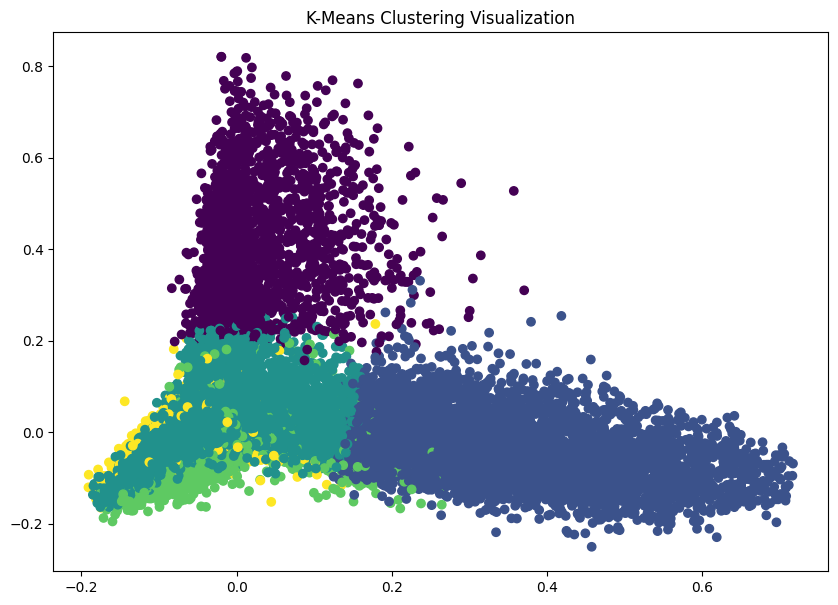

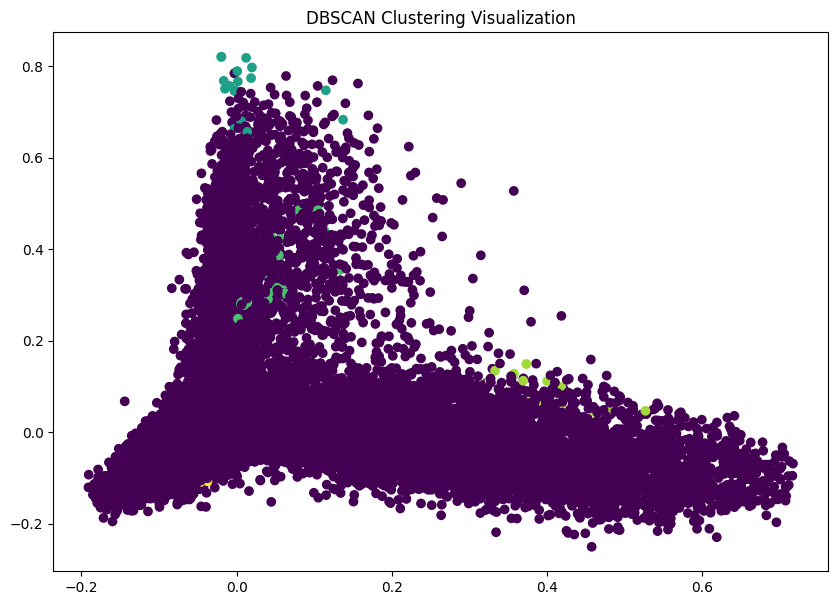

In [ ]:
#Dimensionality Reduction for Visualization:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Dimensionality reduction, like PCA (Principal Component Analysis),
# is a technique to reduce the number of features in a dataset while retaining as much information as possible.
# This is especially helpful when visualizing high-dimensional data, such as TF-IDF vectors.

####Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Plot K-Means clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

# Plot DBSCAN clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering Visualization")
plt.show()


In [ ]:
#Traditional Machine Learning Model Setup
#Data Splitting: Split the data into training and test sets.
#Training and Evaluation: Train Logistic Regression, Random Forest, and SVM models.
#Evaluation Metrics: Use accuracy, precision, recall, and F1-score.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Importing Libraries and Splitting the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target
X = tfidf_matrix
y = reviews_data['label'].apply(lambda x: 1 if x == 'CG' else 0)  # 1 for fake, 0 for original

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#1- for 'CG' (indicating fake reviews).
#0 -for all other labels (e.g., original reviews).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Training Models and Evaluating Performance
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Evaluate the Models
# Function to evaluate and print results
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Evaluate each model
evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)


Logistic Regression - Accuracy: 0.84, Precision: 0.85, Recall: 0.84, F1 Score: 0.84
Random Forest - Accuracy: 0.83, Precision: 0.82, Recall: 0.85, F1 Score: 0.83
SVM - Accuracy: 0.86, Precision: 0.87, Recall: 0.85, F1 Score: 0.86


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# SVM is currently the best-performing model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install tensorflow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Step 4: Deep Learning Model Setup
#LSTM Model Setup
#Since LSTM requires sequential data, we’ll use the following steps:

#Tokenization: Convert the text into sequences of integers.
#Padding: Ensure all sequences have the same length.
#LSTM Model Architecture: Set up the LSTM model with an embedding layer, LSTM layer, and dense output layer.
#Training and Evaluation: Train the model and evaluate it on the test set.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
#Tokenization: The process of converting text into sequences of numerical tokens (e.g., integers representing words).
#Padding: Ensures that all sequences have the same length by adding zeros (or another padding value) to shorter sequences,
### making the data suitable for input into deep learning models like RNNs, LSTMs, or Transformers.
# Initialize tokenizer and fit on the cleaned text
tokenizer = Tokenizer(num_words=5000)  # Limiting to top 5000 words
#Limits the vocabulary size to the top 5000 most frequent words in the dataset. This reduces memory usage and prevents overfitting to rare words.
tokenizer.fit_on_texts(reviews_data['cleaned_text'])
#Analyzes the input text (the cleaned text column) and builds a word index (dictionary mapping each word to a unique integer).

# Convert text to sequences and pad them
X_sequences = tokenizer.texts_to_sequences(reviews_data['cleaned_text'])
X_padded = pad_sequences(X_sequences, maxlen=100)  # Pad to max length of 100 words
#This step ensures that all sequences have the same length, which is required for input to neural networks.
# Convert labels to categorical format
y_lstm = reviews_data['label'].apply(lambda x: 1 if x == 'CG' else 0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs)

In [ ]:
#Building the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model architecture
##A type of Recurrent Neural Network (RNN) layer that is effective for sequence data like text--lstm.
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#train the model
# Split data into train and test sets
X_train_padded, X_test_padded, y_train_lstm, y_test_lstm = train_test_split(X_padded, y_lstm, test_size=0.2, random_state=42)

# Train the model
history = lstm_model.fit(X_train_padded, y_train_lstm, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


809/809 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7541 - loss: 0.4694 - val_accuracy: 0.8810 - val_loss: 0.2693
Epoch 2/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9078 - loss: 0.2244 - val_accuracy: 0.8895 - val_loss: 0.2514
Epoch 3/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9292 - loss: 0.1716 - val_accuracy: 0.8966 - val_loss: 0.2534
Epoch 4/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9431 - loss: 0.1415 - val_accuracy: 0.9018 - val_loss: 0.2618
Epoch 5/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9598 - loss: 0.1039 - val_accuracy: 0.8998 - val_loss: 0.2826


In [ ]:
#evaluate the lstm model
# Evaluate the model on the test set
loss, accuracy = lstm_model.evaluate(X_test_padded, y_test_lstm)
print(f"LSTM Model - Accuracy: {accuracy:.2f}")
#summary of the model
#Input Layer: Processes text data using an embedding layer to map words into dense vectors.
#LSTM Layer: Captures sequential patterns and relationships in the text.
#Dropout Layer: Reduces overfitting by randomly ignoring 50% of neurons during training.
#Output Layer: Outputs the probability of a label (fake or real review).

 23/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8902 - loss: 0.3462

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8981 - loss: 0.2990
LSTM Model - Accuracy: 0.90


In [ ]:
pip install transformers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#bert model(specifically for NLP tasks)
#use Hugging Face’s transformers library to work with BERT.
#For binary classification, outputs a single logit for each class (e.g., 0 for real, 1 for fake).


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#transformers
#The self-attention mechanism allows the model to focus on relevant words in a sequence while processing each word.
#For example, in "The cat sat on the mat," when processing "cat," the model learns to pay attention to "sat" and "mat" as relevant words.

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load dataset and preprocess
data = pd.read_csv('/content/fake reviews dataset.csv')  # Replace with your file path
data['label_encoded'] = LabelEncoder().fit_transform(data['label'])

In [ ]:
# Load BERT tokenizer and model(BERT (Bidirectional Encoder Representations from Transformers))
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
#BERT reads the text in both directions (left-to-right and right-to-left) to understand the full context of a word in a sentence.
#Example: In "I went to the bank to deposit money," BERT understands that "bank" refers to a financial institution, not a riverbank.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize and encode sequences for BERT
def encode_reviews(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='tf'
    )

# Encode the text data
X_encoded = encode_reviews(reviews_data['cleaned_text'])
y_bert = reviews_data['label'].apply(lambda x: 1 if x == 'CG' else 0)


In [ ]:
# Split labels
y_train_enc, y_test_enc = train_test_split(y_bert, test_size=0.2, random_state=42)

# Split tokenized inputs manually
X_train_enc = {
    'input_ids': X_encoded['input_ids'][:len(y_train_enc)],
    'attention_mask': X_encoded['attention_mask'][:len(y_train_enc)]
}
X_test_enc = {
    'input_ids': X_encoded['input_ids'][len(y_train_enc):],
    'attention_mask': X_encoded['attention_mask'][len(y_train_enc):]
}


In [ ]:
bert_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the BERT model without EarlyStopping
history = bert_model.fit(
    {'input_ids': X_train_enc['input_ids'], 'attention_mask': X_train_enc['attention_mask']},
    y_train_enc,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)


Epoch 1/5
809/809 [==============================] - 730s 851ms/step - loss: 8.0270 - accuracy: 0.5015 - val_loss: 8.0902 - val_accuracy: 0.4981
Epoch 2/5
809/809 [==============================] - 682s 843ms/step - loss: 8.0341 - accuracy: 0.5015 - val_loss: 8.0902 - val_accuracy: 0.4981
Epoch 3/5
809/809 [==============================] - 682s 844ms/step - loss: 8.0341 - accuracy: 0.5015 - val_loss: 8.0902 - val_accuracy: 0.4981
Epoch 4/5
809/809 [==============================] - 682s 843ms/step - loss: 8.0341 - accuracy: 0.5015 - val_loss: 8.0902 - val_accuracy: 0.4981
Epoch 5/5
809/809 [==============================] - 682s 843ms/step - loss: 8.0341 - accuracy: 0.5015 - val_loss: 8.0902 - val_accuracy: 0.4981


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = bert_model.evaluate(
    {'input_ids': X_test_enc['input_ids'], 'attention_mask': X_test_enc['attention_mask']},
    y_test_enc
)
print(f"BERT Model - Accuracy: {test_accuracy:.2f}")


253/253 [==============================] - 69s 273ms/step - loss: 8.1139 - accuracy: 0.4966
BERT Model - Accuracy: 0.50


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

class SafeEarlyStopping(EarlyStopping):
    def _implements_train_batch_hooks(self):
        return False

    def _implements_test_batch_hooks(self):
        return False

    def _implements_predict_batch_hooks(self):
        return False

# Use SafeEarlyStopping instead of EarlyStopping
early_stopping = SafeEarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = bert_model.fit(
    X_train_enc,
    y_train_enc,
    validation_split=0.2,
    epochs=5,
    batch_size=16,
    callbacks=[early_stopping]
)


Epoch 1/5
1618/1618 [==============================] - 755s 440ms/step - loss: 0.6599 - accuracy: 0.6072 - val_loss: 0.6898 - val_accuracy: 0.6768
Epoch 2/5
1618/1618 [==============================] - 703s 434ms/step - loss: 0.6765 - accuracy: 0.5106 - val_loss: 0.6931 - val_accuracy: 0.5465
Epoch 3/5
1618/1618 [==============================] - 699s 432ms/step - loss: 0.6941 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.4981
Epoch 4/5
1618/1618 [==============================] - 697s 431ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5738


In [ ]:
# Evaluate the model
test_loss, test_accuracy = bert_model.evaluate(X_test_enc, y_test_enc)
print(f"BERT Model - Accuracy: {test_accuracy:.2f}")

253/253 [==============================] - 69s 274ms/step - loss: 0.6893 - accuracy: 0.6757
BERT Model - Accuracy: 0.68


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Custom EarlyStopping that avoids attribute checks
class SafeEarlyStopping(EarlyStopping):
    def _implements_train_batch_hooks(self):
        return False

    def _implements_test_batch_hooks(self):
        return False

    def _implements_predict_batch_hooks(self):
        return False

# Use SafeEarlyStopping instead of EarlyStopping
early_stopping = SafeEarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:
from transformers import create_optimizer

# Create optimizer
num_train_steps = len(X_train_ids) // 8 * 5  # Batch size=8, epochs=5
optimizer, schedule = create_optimizer(
    init_lr=1e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0
)

# Compile the model
bert_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use SafeEarlyStopping
early_stopping = SafeEarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = bert_model.fit(
    X_train_enc,
    y_train_enc,
    validation_split=0.2,
    epochs=5,
    batch_size=8,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = bert_model.evaluate(X_test_enc, y_test_enc)
print(f"BERT Model - Accuracy: {test_accuracy:.2f}")


Epoch 1/5
3235/3235 [==============================] - 813s 239ms/step - loss: 0.6970 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 2/5
3235/3235 [==============================] - 773s 239ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 3/5
253/253 [==============================] - 69s 271ms/step - loss: 0.6931 - accuracy: 0.5034
BERT Model - Accuracy: 0.50


In [ ]:
#due to overfitting cause bert model only gets max its 68% accuracy.

In [ ]:
#among all these fake review classification models,LSTM is best performing model
#Input Layer: Processes text data using an embedding layer to map words into dense vectors.
#LSTM Layer: Captures sequential patterns and relationships in the text.
#Dropout Layer: Reduces overfitting by randomly ignoring 50% of neurons during training.
#Output Layer: Outputs the probability of a label (fake or real review).
LSTM Model - Accuracy: 0.90 for fake review classification.